<a href="https://colab.research.google.com/github/manal-0603/Diabetes_Prediction_System_Using_ML/blob/main/Diabets_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **<center><font style="color:rgb(100,109,254)">Diabetes Prediction Using Machine Learning</font> </center>**

<center>
<img src='https://www.cdc.gov/diabetes/images/library/spotlights/diabetes-stats-report-724px.png?_=42420' with="100%"></center>

Dans ce mini projet, nous allons prédire si le patient est diabétique ou non sur la base des features que nous fournirons à notre modèle d'apprentissage automatique



- **`Step 1:` Téléchargement des données**

- **`Step 2:` Analyse exploratoire des données (EDA)**

- **`Step 3:` Visualisation des données**

- **`Step 4:` Standardisation des données**

- **`Step 5:` Diviser les données en ensemble d'apprentissage et de test**

- **`Step 6:` Mettre en œuvre l'approche Random Forest**

- **`Step 7:` Mettre en œuvre l'approche k-nearest neighbors**

- **`Step 8:` Mettre en œuvre l'approche  Support Vector Machine**
    
- **`Step 9:` Tester le modèle le plus performant**

### **<font style="color:rgb(134,19,348)"> Importation des bibliothèques</font>**

Nous allons commencer par installer et importer les bibliothèques requises.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Analyse exploratoire des données

## **<font style="color:rgb(134,19,348)">Step 1: Téléchargement des données</font>**

Dans un premier temps, nous téléchargerons et visualiserons les données ainsi que les étiquettes pour avoir une idée de ce à quoi nous allons avoir affaire. Nous utiliserons l'ensemble de données provient à l'origine de l'Institut national du diabète et des maladies digestives et rénales. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est diabétique ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été placées sur la sélection de ces instances à partir d'une plus grande base de données.

In [57]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
df_diabetes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')

df_diabetes.head()

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **<font style="color:rgb(134,19,348)">Step 2: Analyse exploratoire des données (EDA)</font>**

In [58]:
# Afficher les colonnes disponibles dans notre dataset
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
# afficher des informations sur notre dataframe, 
# y compris le type d'index et les colonnes, les valeurs non nulles et l'utilisation de la mémoire.
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
# Afficher les statistiques descriptives de l'ensemble des données
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
# Savoir si notre ensemble de données contient des valeurs nulles ou non
df_diabetes.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [62]:
# le nombre de valeurs nulles de notre jeu de données.
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Ici, à partir du code ci-dessus, nous avons d'abord vérifié s'il y avait des valeurs nulles avec la fonction IsNull() , puis nous avons pris la somme de toutes ces valeurs manquantes de la fonction sum() et le résultat que nous obtenons maintenant est qu'il n'y a pas valeurs manquantes, mais ce n'est en fait pas une vraie car dans cet ensemble de données particulier, toutes les valeurs manquantes ont reçu le 0 comme valeur. Par conséquent, nous remplacerons d'abord la valeur 0 par la valeur NAN, puis nous recommencerons le processus.

In [63]:
# Nous allons créer une copie des données et des indices de l'objet appelant.
# Les modifications apportées aux données ou aux indices de la copie ne seront pas reflétées dans l'objet d'origine 
df_diabetes_copy = df_diabetes.copy(deep = True) 

In [64]:
# Nous choisissons seulement les colonnes qui peuvent avoir des valeurs nulles
# Nous remplaçons les valeurs 0 de ces colonnes choisis par des valeurs manquantes NAN
df_diabetes_copy[['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']] = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)

df_diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [65]:
# Afficher le nombre des valeurs NAN pour chaque colonne
print(df_diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## **<font style="color:rgb(134,19,348)">Step 3: Visualisation des données</font>**

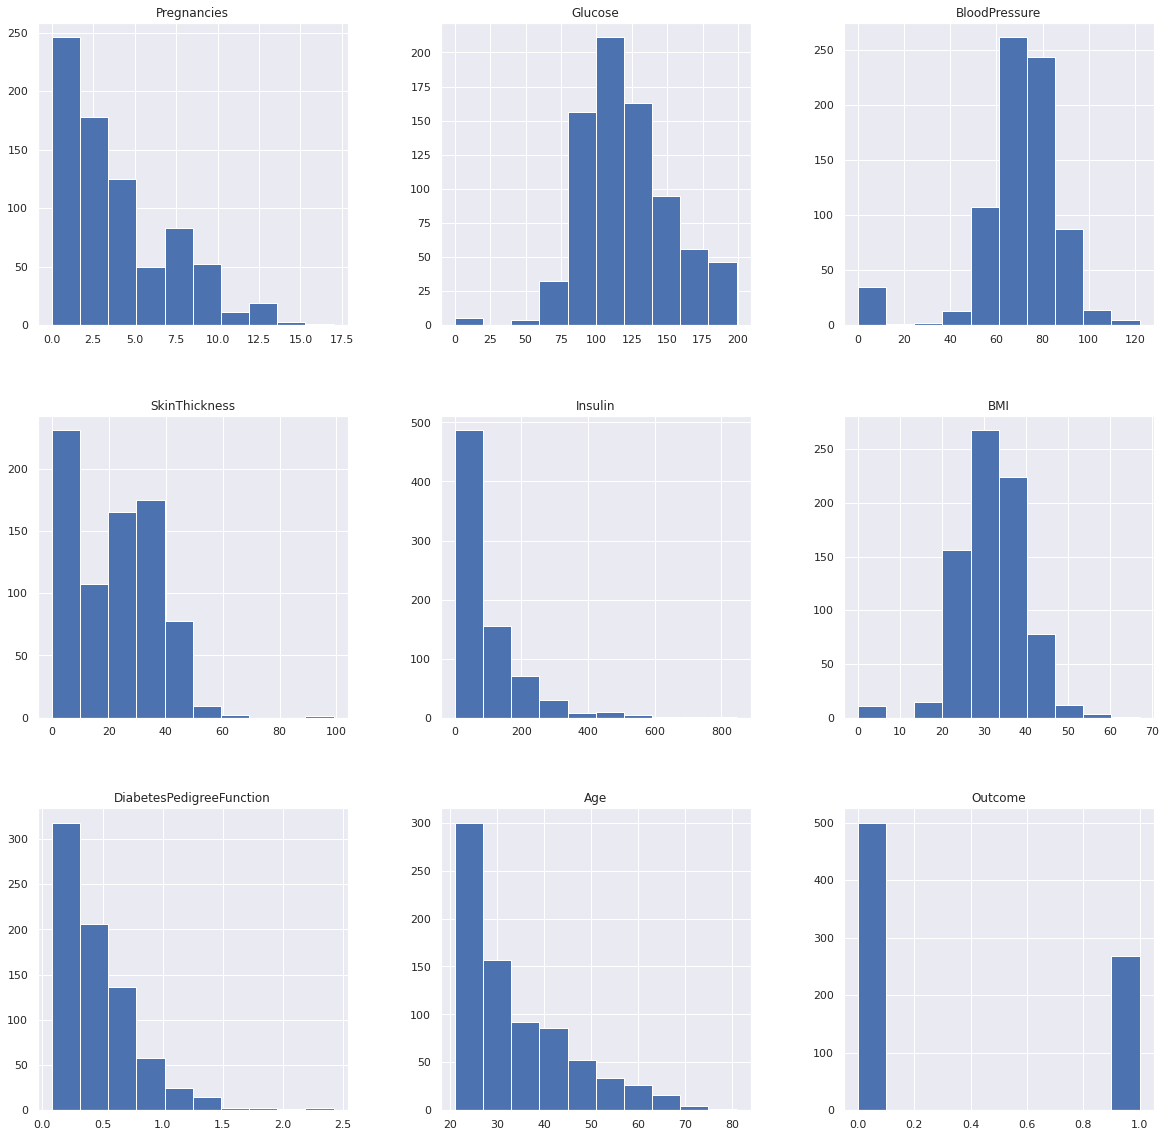

In [66]:
# Tracer une représentation de la distribution des données. 
# Tracer un histogramme pour chaque série du DataFrame, ce qui donne un histogramme par colonne.
p = df_diabetes.hist(figsize = (20,20))

In [67]:
# Remplacer les valeurs NAN de la colonne 'Glucose' par la valeur moyenne de cette colonne particulière
df_diabetes_copy['Glucose'].fillna(df_diabetes_copy['Glucose'].mean(), inplace = True) 

# Remplacer les valeurs NAN de la colonne 'BloodPressure' par la valeur moyenne de cette colonne particulière
df_diabetes_copy['BloodPressure'].fillna(df_diabetes_copy['BloodPressure'].mean(), inplace = True) 

# Remplacer les valeurs NAN de la colonne 'SkinThickness' par la valeur médianne de cette colonne particulière
df_diabetes_copy[ 'SkinThickness'].fillna(df_diabetes_copy['SkinThickness'].median(), inplace = True) 

# Remplacer les valeurs NAN de la colonne 'Insulin' par la valeur médianne de cette colonne particulière
df_diabetes_copy['Insulin'].fillna(df_diabetes_copy['Insulin'].median(), inplace = True) 

# Remplacer les valeurs NAN de la colonne 'BMI' par la valeur médianne de cette colonne particulière
df_diabetes_copy['BMI'].fillna(df_diabetes_copy['BMI'].median(), inplace = True)

Maintenant nous allons utiliser à nouveau le graphique hist pour voir la distribution de l'ensemble de données , mais cette fois, nous nous allons utiliser cette visualisation pour voir les changements que nous pouvons voir après la suppression de ces valeurs nulles de l'ensemble de données 

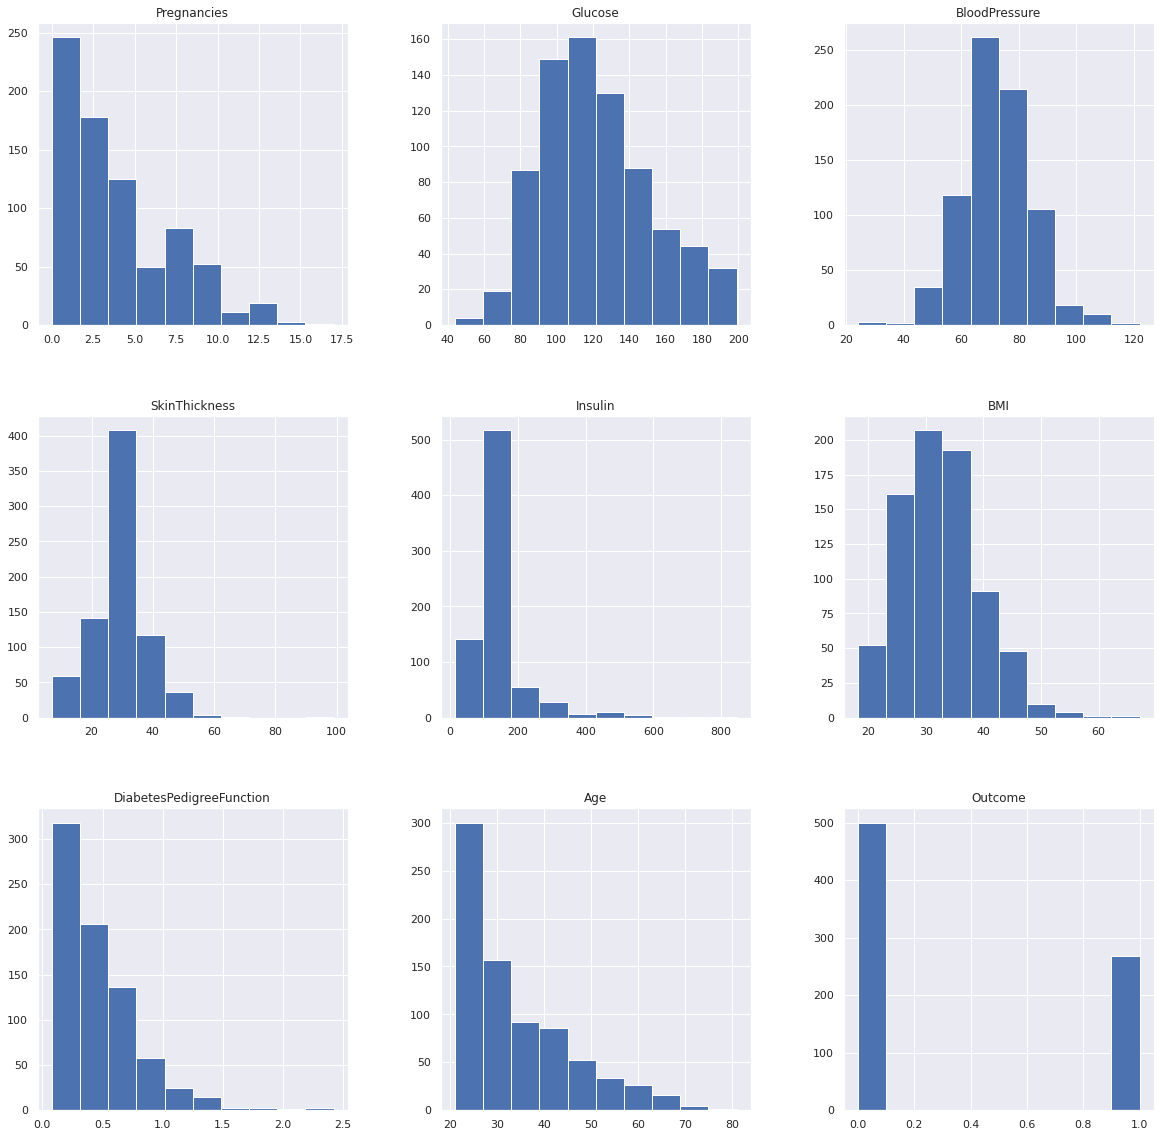

In [68]:
# Tracer les distributions après avoir supprimé les valeurs NAN.
p = df_diabetes_copy.hist(figsize = (20,20))

Maintenant, vérifions à quel point notre colonne 'Outcome' est équilibrée

0    500
1    268
Name: Outcome, dtype: int64


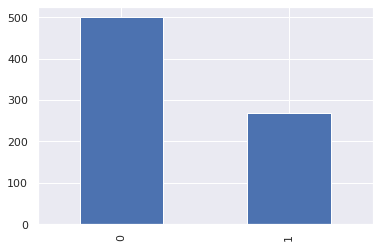

In [69]:
# Renvoie une série contenant le nombre de lignes uniques de la colonne 'Outcome'
print(df_diabetes.Outcome.value_counts()) 

# Tracer un graphique à barres qui montre les comparaisons entre les valeurs uniques de la colonne 'Outcome' 
p = df_diabetes.Outcome.value_counts().plot(kind="bar")

Ici, à partir de la visualisation ci-dessus, il est clairement visible que notre ensemble de données est complètement déséquilibré en fait, le nombre de patients diabétiques est la moitié des patients non diabétiques.

## **Corrélation entre toutes les features**

###  Avant nettoyage :

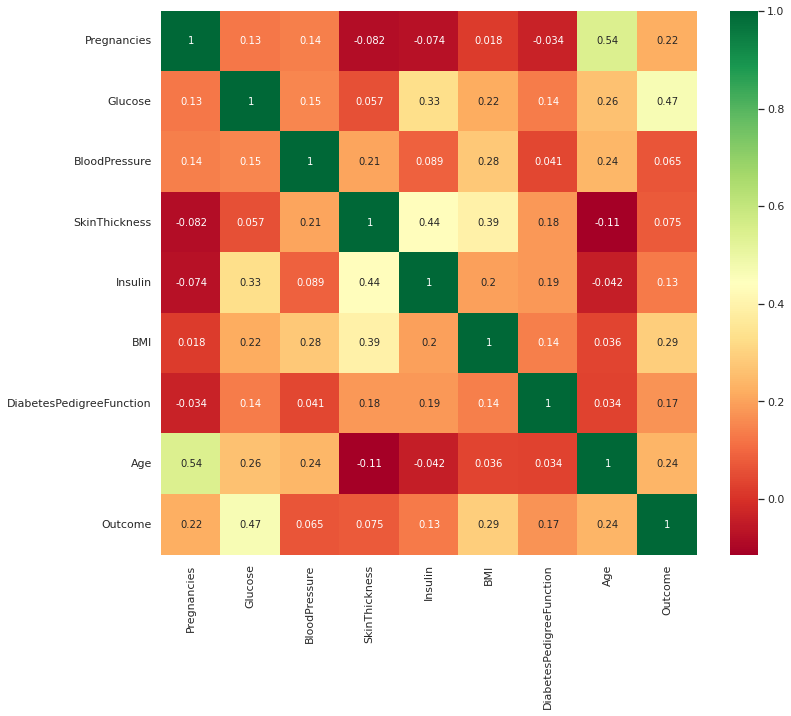

In [71]:
# Régler la taille de la figure sur 12 par 10.
plt.figure(figsize=(12,10))

# seaborn a une méthode simple pour présenter heatmap
p = sns.heatmap(df_diabetes.corr(), annot=True,cmap ='RdYlGn')

###  Après nettoyage :

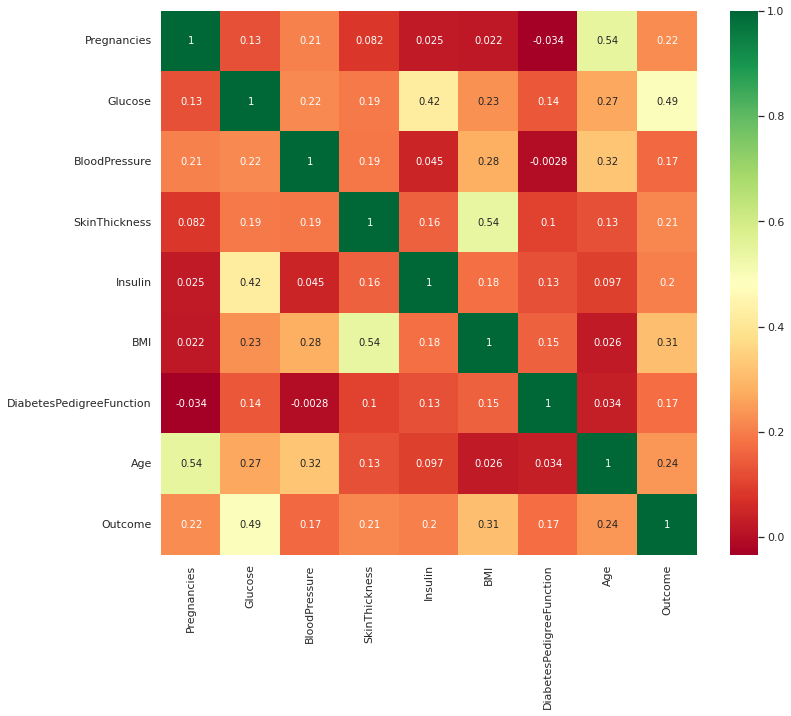

In [72]:
# Régler la taille de la figure sur 12 par 10.
plt.figure(figsize=(12,10))

# seaborn a une méthode simple pour présenter heatmap
p = sns.heatmap(df_diabetes_copy.corr(), annot=True,cmap ='RdYlGn')

## **<font style="color:rgb(134,19,348)">Step 4: Standardisation des données</font>**

Les données prétraitées peuvent contenir des attributs avec un mélange d'échelles pour diverses quantités.

De nombreuses méthodes d'apprentissage automatique attendent ou sont plus efficaces si les attributs de données ont la même échelle.

Deux méthodes de mise à l'échelle des données populaires sont la normalisation et la standardisation.

- La normalisation fait référence à la remise à l'échelle des attributs numériques à valeur réelle dans la plage 0 et 1.

- La standardisation fait référence au déplacement de la distribution de chaque attribut pour avoir une moyenne de zéro et un écart type de un (variance unitaire).

### Avant standardisation : 

In [73]:
df_diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Après standardisation : 

In [74]:
standardScaler_X = StandardScaler()

df_after_standard_scaling_X =  pd.DataFrame(standardScaler_X.fit_transform(df_diabetes_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

df_after_standard_scaling_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


nous pouvons voir que chaque valeur est maintenant sur la même échelle, ce qui aidera notre modèle ML à donner un meilleur résultat.

## **<font style="color:rgb(134,19,348)">Step 5: Division des données en ensemble d'apprentissage et de test</font>**

In [75]:
# Target 
Y = df_diabetes_copy['Outcome']

In [76]:
from sklearn.model_selection import train_test_split

# # Diviser les données en (67 %) d'entrainement et (33 %) de test 
X_train, X_test, y_train, y_test = train_test_split(df_after_standard_scaling_X, Y, test_size=0.33, random_state=7)

## **<font style="color:rgb(134,19,348)">Step 6: Random Forest</font>**

Le random forest est un algorithme de prédiction , est composé de plusieurs arbres de décision, entrainés de manière indépendante sur des sous-ensembles du dataset d'apprentissage (méthode de bagging). Chacun produit une estimation, et c'est la combinaison des résultats qui va donner la prédiction finale qui se traduit par une variance réduite. En somme, il s'agit de s'inspirer de différents avis, traitant un même problème, pour mieux l'appréhender. Chaque modèle est distribué de façon aléatoire en sous-ensembles d'arbres décisionnels. 

### Comment fonctionne un random forest de classification ?
Dans un random forest de classification, l'estimation finale consiste à choisir la catégorie de réponse la plus fréquente. Plutôt qu'utiliser tous les résultats obtenus, on procède à une sélection en recherchant la prévision qui revient le plus souvent.

### **Construction du modèle**

In [77]:
from sklearn.ensemble import RandomForestClassifier


test_scores = []
train_scores = []

for i in range(1,50):

    rfc = RandomForestClassifier(i)
    rfc.fit(X_train,y_train)
    
    train_scores.append(rfc.score(X_train,y_train))
    test_scores.append(rfc.score(X_test,y_test))

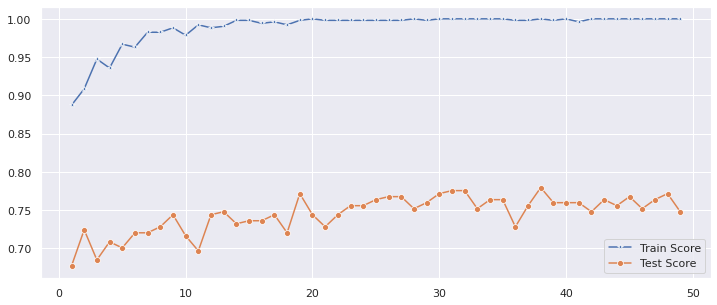

In [78]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')

In [79]:
rfc = RandomForestClassifier(15)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15)

Maintenant, après avoir construit le modèle, vérifions l'accuracy du modèle sur l'ensemble de données d'apprentissage.

In [80]:
rfc_train = rfc.predict(X_train)

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 0.9922178988326849


Nous pouvons donc voir ici que notre modèle est en overfitting sur l'ensemble de données d'entraînement



In [81]:
predictions = rfc.predict(X_test)

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7559055118110236


### Analyse des performances du modèle

### 1)  Matrice de confusion
une matrice de confusion est une technique utilisée pour résumer les performances d'un algorithme de classification. Elle nous donne une meilleure idée de ce que notre modèle de classification prédit correctement et des types d'erreurs qu'il commet.

Le nombre de valeurs prédites correctes et incorrectes est résumé et stocké dans le tableau par rapport aux valeurs réelles, comme indiqué ci-dessous :
<center>
<img src="https://miro.medium.com/max/487/0*-GAP6jhtJvt7Bqiv.png"></center>

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,predictions)
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,133,29,162
1,33,59,92
All,166,88,254


Text(0.5, 12.5, 'Predicted label')

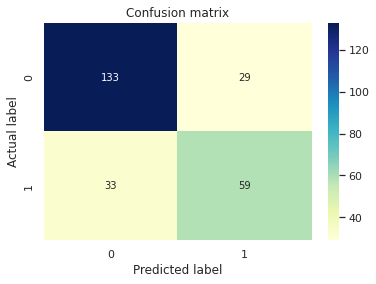

In [83]:
p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Optimisation des hyper paramètres 

Les modèles de régression (ou de classification) sont des fonctions mathématiques qui dépendent d’hyperparamètres . Le réglage de ces hyperparamètres va impacter fortement le score final de ce modèle.

GridSearchCV permet réaliser automatiquement la recherche des meilleurs hyperparamètres. L’utilisateur aura juste à préciser quels hyperparamètres il souhaite faire varier leurs niveaux de variation et GridSearchCV déterminera automatiquement le meilleur réglage.

In [84]:
# Les paramètres utilisés par notre forêt actuelle 
print('Paramètres actuellement utilisés :\n') 
print(rfc.get_params())

Paramètres actuellement utilisés :

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


c'est une liste assez écrasante! Comment savoir par où commencer ? Un bon endroit est la documentation sur RandomForestClassifier dans Scikit-Learn . Cela nous indique que les paramètres les plus importants sont : (n_estimators) et (max_features).

In [85]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': [2, 8],
    'n_estimators': [1, 100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=15), n_jobs=-1,
             param_grid={'max_features': [2, 8],
                         'n_estimators': [1, 100, 200, 300, 1000]},
             verbose=2)

In [86]:
print("Le meilleur score : ", grid_search.best_score_)
print("Les meilleurs parametres : ", grid_search.best_params_)

Le meilleur score :  0.7683825196065097
Les meilleurs parametres :  {'max_features': 2, 'n_estimators': 300}


## **<font style="color:rgb(134,19,348)">Step 7: k-nearest neighbors</font>**

L’algorithme des K plus proches voisins ou K-nearest neighbors (kNN) est un algorithme de Machine Learning qui appartient à la classe des algorithmes d’apprentissage supervisé simple et facile à mettre en œuvre qui peut être utilisé pour résoudre les problèmes de classification et de régression.

L’intuition derrière l’algorithme des K plus proches voisins est l’une des plus simples de tous les algorithmes de Machine Learning supervisé :

#### **Étape 1** : 
Sélectionnez le nombre K de voisins
#### **Étape 2** :  
Calculez la distance ( Euclidienne  |  Manhatan ) 

<center>
<img src='https://i0.wp.com/datascientest.com/wp-content/uploads/2020/11/eucledienne.png?w=363&ssl=1' with="100%">
<img src='https://i0.wp.com/datascientest.com/wp-content/uploads/2020/11/m.png?w=471&ssl=1' with="100%">
</center>

Du point non classifié aux autres points.

#### **Étape 3** :  
Prenez les K voisins les plus proches selon la distance calculée.
#### **Étape 4** :  
Parmi ces K voisins, comptez le nombre de points  appartenant à chaque catégorie.
#### **Étape 5** : 
Attribuez le nouveau point à la catégorie la plus présente parmis ces K voisins.

#### **Étape 6** : 
Notre modèle est prêt :
<center>
<img src='https://i0.wp.com/datascientest.com/wp-content/uploads/2020/11/Illu-2-KNN.jpg?resize=1024%2C492&ssl=1' with="100%">
</center>


## **Construction du modèle**

In [87]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

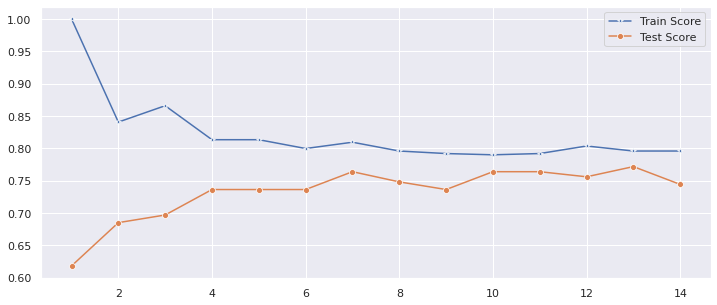

In [88]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Le meilleur résultat est capturé à k13 donc 13 est utilisé pour le modèle final

In [89]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

Maintenant, après avoir construit le modèle, vérifions l'accuracy du modèle sur l'ensemble de données d'apprentissage.

In [90]:
knn_train = rfc.predict(X_train)

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, knn_train)))

Accuracy_Score = 0.9922178988326849


Nous pouvons donc voir ici que notre modèle est en overfitting sur l'ensemble de données d'entraînement



In [91]:
predictions = knn.predict(X_test)

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7716535433070866


### Analyse des performances du modèle

### 1)  Matrice de confusion
une matrice de confusion est une technique utilisée pour résumer les performances d'un algorithme de classification. Elle nous donne une meilleure idée de ce que notre modèle de classification prédit correctement et des types d'erreurs qu'il commet.

Le nombre de valeurs prédites correctes et incorrectes est résumé et stocké dans le tableau par rapport aux valeurs réelles, comme indiqué ci-dessous :
<center>
<img src="https://miro.medium.com/max/487/0*-GAP6jhtJvt7Bqiv.png"></center>

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,26,162
1,32,60,92
All,168,86,254


Text(0.5, 12.5, 'Predicted label')

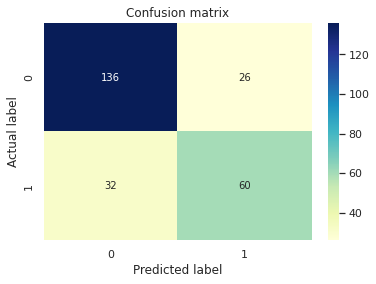

In [93]:
p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Optimisation des hyper paramètres 

Les modèles de régression (ou de classification) sont des fonctions mathématiques qui dépendent d’hyperparamètres . Le réglage de ces hyperparamètres va impacter fortement le score final de ce modèle.

GridSearchCV permet réaliser automatiquement la recherche des meilleurs hyperparamètres. L’utilisateur aura juste à préciser quels hyperparamètres il souhaite faire varier leurs niveaux de variation et GridSearchCV déterminera automatiquement le meilleur réglage.

In [94]:
# Les paramètres utilisés par notre forêt actuelle 
print('Paramètres actuellement utilisés :\n') 
print(knn.get_params())

Paramètres actuellement utilisés :

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}


c'est une liste assez écrasante! Comment savoir par où commencer ? Un bon endroit est la documentation sur RandomForestClassifier dans Scikit-Learn . Cela nous indique que les paramètres les plus importants sont : (n_neighbors).

In [95]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'n_neighbors':np.arange(1,100)}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [96]:
print("Le meilleur score : ", grid_search.best_score_)
print("Les meilleurs parametres : ", grid_search.best_params_)

Le meilleur score :  0.7606700932800304
Les meilleurs parametres :  {'n_neighbors': 78}


## **<font style="color:rgb(134,19,348)">Step 8: Support Vector Machine</font>**

Le SVM est un modèle d’apprentissage automatique supervisé qui est principalement utilisé pour les classifications (mais il peut aussi être utilisé pour la régression !). L’intuition derrière les Support Vector Machines est de simplement séparer des données en les délimitant (créer des frontières de décisions) afin de créer des groupes.

<center>
<img src='https://i0.wp.com/miro.medium.com/max/6400/1*tYZ8_SodwSUPJTuWQs-CoA.jpeg?resize=465%2C352&ssl=1' with="100%">
</center>

### **Construction du modèle**

In [97]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)

SVC()

Maintenant, après avoir construit le modèle, vérifions l'accuracy du modèle sur l'ensemble de données d'apprentissage.

In [98]:
svc_train = svc.predict(X_train)

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, svc_train)))

Accuracy_Score = 0.830739299610895


Nous pouvons donc voir ici que notre modèle est en overfitting sur l'ensemble de données d'entraînement



In [99]:
predictions = svc.predict(X_test)

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7716535433070866


### Analyse des performances du modèle

### 1)  Matrice de confusion
une matrice de confusion est une technique utilisée pour résumer les performances d'un algorithme de classification. Elle nous donne une meilleure idée de ce que notre modèle de classification prédit correctement et des types d'erreurs qu'il commet.

Le nombre de valeurs prédites correctes et incorrectes est résumé et stocké dans le tableau par rapport aux valeurs réelles, comme indiqué ci-dessous :
<center>
<img src="https://miro.medium.com/max/487/0*-GAP6jhtJvt7Bqiv.png"></center>

In [100]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,138,24,162
1,34,58,92
All,172,82,254


Text(0.5, 12.5, 'Predicted label')

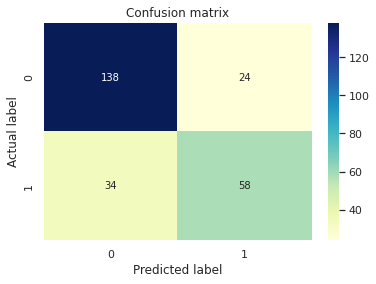

In [101]:
p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Optimisation des hyper paramètres 

Les modèles de régression (ou de classification) sont des fonctions mathématiques qui dépendent d’hyperparamètres . Le réglage de ces hyperparamètres va impacter fortement le score final de ce modèle.

GridSearchCV permet réaliser automatiquement la recherche des meilleurs hyperparamètres. L’utilisateur aura juste à préciser quels hyperparamètres il souhaite faire varier leurs niveaux de variation et GridSearchCV déterminera automatiquement le meilleur réglage.

In [102]:
# Les paramètres utilisés par notre forêt actuelle 
print('Paramètres actuellement utilisés :\n') 
print(svc.get_params())

Paramètres actuellement utilisés :

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


c'est une liste assez écrasante! Comment savoir par où commencer ? Un bon endroit est la documentation sur RandomForestClassifier dans Scikit-Learn . Cela nous indique que les paramètres les plus importants sont : (Kernel) et (C) et 'galla' et 'degree'.

In [103]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = { 'kernel' : ['linear', 'rbf', 'poly'],
                'degree' : [0, 1, 2, 3, 4, 5, 6]
              }

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = SVC(), param_grid = param_grid)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [0, 1, 2, 3, 4, 5, 6],
                         'kernel': ['linear', 'rbf', 'poly']})

In [104]:
print("Le meilleur score : ", grid_search.best_score_)
print("Les meilleurs parametres : ", grid_search.best_params_)

Le meilleur score :  0.770416904625928
Les meilleurs parametres :  {'degree': 1, 'kernel': 'poly'}


## **<font style="color:rgb(134,19,348)">Step 9: Le modèle le plus performant</font>**


Les résultats que l'on a trouvé : 

    Random Forest : 0.7684278525771794
    knn : 0.7606700932800304
    SVM : 0.770416904625928

Par conséquent,  Support Vector Machine  est le meilleur modèle pour ce problème.